# Exploratory Data Analysis 🥏
In this notebook, I use the cleaned version of data to perform an exploratory data analysis (EDA) on data scraped from the AUDL website. In this EDA, I look to explore two problems: </br>
1. Does playing on your home field give an advantage, and if so, how much?
- It's a well-known phenomenon in any sport that playing on your home field tends to offer an advantage. This could be because you practice there, or maybe you know the fans and they give a boost. Fans of ultimae in particular are a big part of the game and can be a huge deciding factor in the energy levels of the teams on the field. For this problem, I'll assess game scores for all AUDL season and try to assess what kind of advantages playing at home can have.
2. Can players be categorized into their on-field roles based on stats?
- The AUDL website breaks players into four categories: Handler, Cutter, Defender, and Hybrid. Of the nearly 2,700 players on the website, < 500 have this designation on their webpage. I will be analyzing the stats of these different groups and creating a classifier based on their stats that could be used in the future to classify any players without a classification.
</br>


In [16]:
# IMPORTS
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os

## Problem 1: Home Court Advantage 🏡

In [11]:
# Import and sample data
DATA_PATH = "DATA\\postproc\\all_games_stats.csv"
df = pd.read_csv(DATA_PATH)
df.head()

,team,turnovers,blocks,home_team,home_score,away_team,away_score,completions,total_passes,o_line_scores,...,o_line_posessions,d_line_scores,d_line_points,d_line_posessions,rz_scores,rz_posessions,huck_completions,huck_attempts,season,is_home_team
0,Spiders,23,10,TOR,18,SJ,28,234,257,17,...,28,11,30,23,NaN,NaN,NaN,NaN,2014,False
1,Rush,22,19,TOR,31,NY,16,270,292,16,...,25,15,33,30,NaN,NaN,NaN,NaN,2014,True
2,Empire,37,12,TOR,31,NY,16,213,250,15,...,47,1,18,8,NaN,NaN,NaN,NaN,2014,False
3,Spiders,19,10,SJ,23,MAD,20,272,291,16,...,28,7,25,15,NaN,NaN,NaN,NaN,2014,True
4,Radicals,21,16,SJ,23,MAD,20,265,286,15,...,33,5,22,12,NaN,NaN,NaN,NaN,2014,False


In [13]:
# Null Data and DTypes Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   team               2238 non-null   object 
 1   turnovers          2238 non-null   int64  
 2   blocks             2238 non-null   int64  
 3   home_team          2238 non-null   object 
 4   home_score         2238 non-null   int64  
 5   away_team          2238 non-null   object 
 6   away_score         2238 non-null   int64  
 7   completions        2238 non-null   int64  
 8   total_passes       2238 non-null   int64  
 9   o_line_scores      2238 non-null   int64  
 10  o_line_points      2238 non-null   int64  
 11  o_line_posessions  2238 non-null   int64  
 12  d_line_scores      2238 non-null   int64  
 13  d_line_points      2238 non-null   int64  
 14  d_line_posessions  2238 non-null   int64  
 15  rz_scores          268 non-null    float64
 16  rz_posessions      268 n

In [12]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

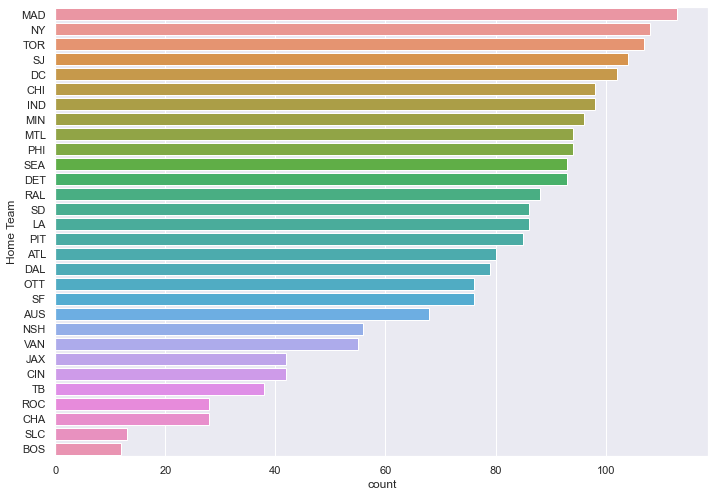

In [35]:
# Count of Home Team 
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(data=df, 
              y='home_team',
              order = df['home_team'].value_counts().index)
plt.ylabel('Home Team')
plt.show()


In [40]:
# Create a df for stacked total games
pd.DataFr

---------------------------
# X. Scratch
---------------------------

In [ ]:
# Heatmap of Who has Played Whom
df_plot = df.groupby(['home_team', 'away_team']).size().reset_index().pivot(columns='home_team',
                                                                       index='away_team', 
                                                                       values=0)

sns.heatmap(df_plot)